In [1]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 9.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


# Downloading Dataset for competation 2 متنزلش دي يا علي نزل الداتا الي تحت هي بتاع المسابقة الي شغالين عليها

In [ ]:
!pip install -U -q PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
file_id = '1iYgiw4B4uHG78trDbJ9n63ZKCEH96vvx' # URL id. 
fileId = drive.CreateFile({'id': file_id}) #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
fileId.GetContentFile('UMNIST.zip')  # Save Drive file as a local file

In [ ]:
!unzip /content/UMNIST.zip

Archive:  /content/UMNIST.zip
  inflating: Challenge Track 2_ Pothole severity classification via computer vision/png/Scene 2/0162.png  
  inflating: Challenge Track 2_ Pothole severity classification via computer vision/png/Scene 2/0163.png  
  inflating: Challenge Track 2_ Pothole severity classification via computer vision/png/Scene 2/0169.png  
  inflating: Challenge Track 2_ Pothole severity classification via computer vision/png/Scene 2/0135.png  
  inflating: Challenge Track 2_ Pothole severity classification via computer vision/png/Scene 2/0143.png  
  inflating: Challenge Track 2_ Pothole severity classification via computer vision/png/Scene 2/0168.png  
  inflating: Challenge Track 2_ Pothole severity classification via computer vision/png/Scene 2/0141.png  
  inflating: Challenge Track 2_ Pothole severity classification via computer vision/png/Scene 2/0149.png  
  inflating: Challenge Track 2_ Pothole severity classification via computer vision/png/Scene 2/0140.png  
  infla

## getting data and visulalize some class

In [ ]:
!wget https://he-public-data.s3.ap-southeast-1.amazonaws.com/dataset.zip

--2023-01-14 18:09:41--  https://he-public-data.s3.ap-southeast-1.amazonaws.com/dataset.zip
Resolving he-public-data.s3.ap-southeast-1.amazonaws.com (he-public-data.s3.ap-southeast-1.amazonaws.com)... 52.219.36.63
Connecting to he-public-data.s3.ap-southeast-1.amazonaws.com (he-public-data.s3.ap-southeast-1.amazonaws.com)|52.219.36.63|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2023-01-14 18:09:41 ERROR 403: Forbidden.



In [2]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [3]:
from google.colab import drive
!cp '/content/gdrive/MyDrive/dataset.zip' "visualpollution.zip"

In [4]:
!unzip /content/visualpollution.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/images/fa2405166ec7764b052959f55b2cb21e.jpg  
  inflating: dataset/images/2c6cfe092f7ae14cd67f79633e7b329c.jpg  
  inflating: dataset/images/e25504419a506119a04982130738469a.jpg  
  inflating: dataset/images/c690dd80504ff3956e1e50a2fbc7c7f4.jpg  
  inflating: dataset/images/e4b35fb8567c0d8d99de36e96bc4fde9.jpg  
  inflating: dataset/images/beaf13e79379657b526c349e95821023.jpg  
  inflating: dataset/images/4e90d0fe2795542468fb5d1cc1834c10.jpg  
  inflating: dataset/images/5235b7a1aef39d0539839873d5a3418a.jpg  
  inflating: dataset/images/f48ae52f06f8075c628e6a438e93426f.jpg  
  inflating: dataset/images/133d32aab2d56507ccb45c9609b2ec48.jpg  
  inflating: dataset/images/f30492c8c7d9b5d4d939e6035fa73170.jpg  
  inflating: dataset/images/3403ec3125fd76b911e88ada121e366a.jpg  
  inflating: dataset/images/be0992e2f3b9093139358e2d83e6fecc.jpg  
  inflating: dataset/images/710796142ecb047ea6839a88063ba4a3.jpg  
  inflating

In [5]:
import pandas as pd
df = pd.read_csv("/content/dataset/train.csv")
df.head()

class                            image_path           name   xmax   xmin  \
0    3.0  4a48c42c9579ec0399e6c5a3e825e765.jpg        GARBAGE  797.0  701.0   
1    3.0  4a48c42c9579ec0399e6c5a3e825e765.jpg        GARBAGE  932.0  786.0   
2    3.0  4a48c42c9579ec0399e6c5a3e825e765.jpg        GARBAGE  736.0  657.0   
3    7.0  ea906a663da6321bcef78be4b7d1afff.jpg  BAD_BILLBOARD  986.0  786.0   
4    8.0  1c7d48005a12d1b19261b8e71df7cafe.jpg   SAND_ON_ROAD  667.0  549.0   

    ymax   ymin  
0  262.0  211.0  
1  329.0  238.0  
2  275.0  229.0  
3  136.0    0.0  
4  228.0  179.0

In [6]:
df.groupby("class")["name"].value_counts()

class  name             
0.0    GRAFFITI             1124
1.0    FADED_SIGNAGE         107
2.0    POTHOLES             2625
3.0    GARBAGE              8597
4.0    CONSTRUCTION_ROAD    2730
5.0    BROKEN_SIGNAGE         83
6.0    BAD_STREETLIGHT         1
7.0    BAD_BILLBOARD        1555
8.0    SAND_ON_ROAD          748
9.0    CLUTTER_SIDEWALK     2253
10.0   UNKEPT_FACADE         127
Name: name, dtype: int64

In [8]:
img_path = df[df["name"] == "FADED_SIGNAGE"]["image_path"]
img_cordicate = df[df["name"] == "FADED_SIGNAGE"][["xmax","xmin","ymax","ymin"]]
img_cordicate = img_cordicate.values
print(img_path, img_cordicate)

562      2bb02e9237647d20bf2188ba7b798f0a.jpg
754      386f384cbbe31cf99bb9a86958839bc1.jpg
1368     8715068a119b282973c2c12d8b1910cd.jpg
1408     032488ec5ffbb993ab79dcd797787c95.jpg
1535     556fcdfe8e20050ac47e34bb69aae7c3.jpg
                         ...                 
18728    098b43bae190eca94ea39ee59e4cc068.jpg
18756    69b6282d7731968c153e327b4f257a11.jpg
18757    69b6282d7731968c153e327b4f257a11.jpg
19334    4a327e37237452aeb2a31cecb9cedac2.jpg
19363    21e3415fab08be092f9ba781a096a666.jpg
Name: image_path, Length: 107, dtype: object [[ 3.860e+02  2.910e+02  1.840e+02  1.040e+02]
 [ 3.620e+02  2.980e+02  2.060e+02  1.420e+02]
 [ 3.790e+02  2.390e+02  4.610e+02  2.670e+02]
 [ 6.680e+02  5.960e+02  1.310e+02  8.500e+01]
 [ 4.440e+02  2.750e+02  2.860e+02  6.200e+01]
 [ 4.470e+02  3.940e+02  3.770e+02  2.200e+02]
 [ 4.150e+02  3.480e+02  3.730e+02  2.400e+02]
 [ 5.530e+02  4.860e+02  4.070e+02  2.110e+02]
 [ 1.570e+02 -1.100e+01  2.710e+02  6.900e+01]
 [ 4.020e+02  3.510e+02  1

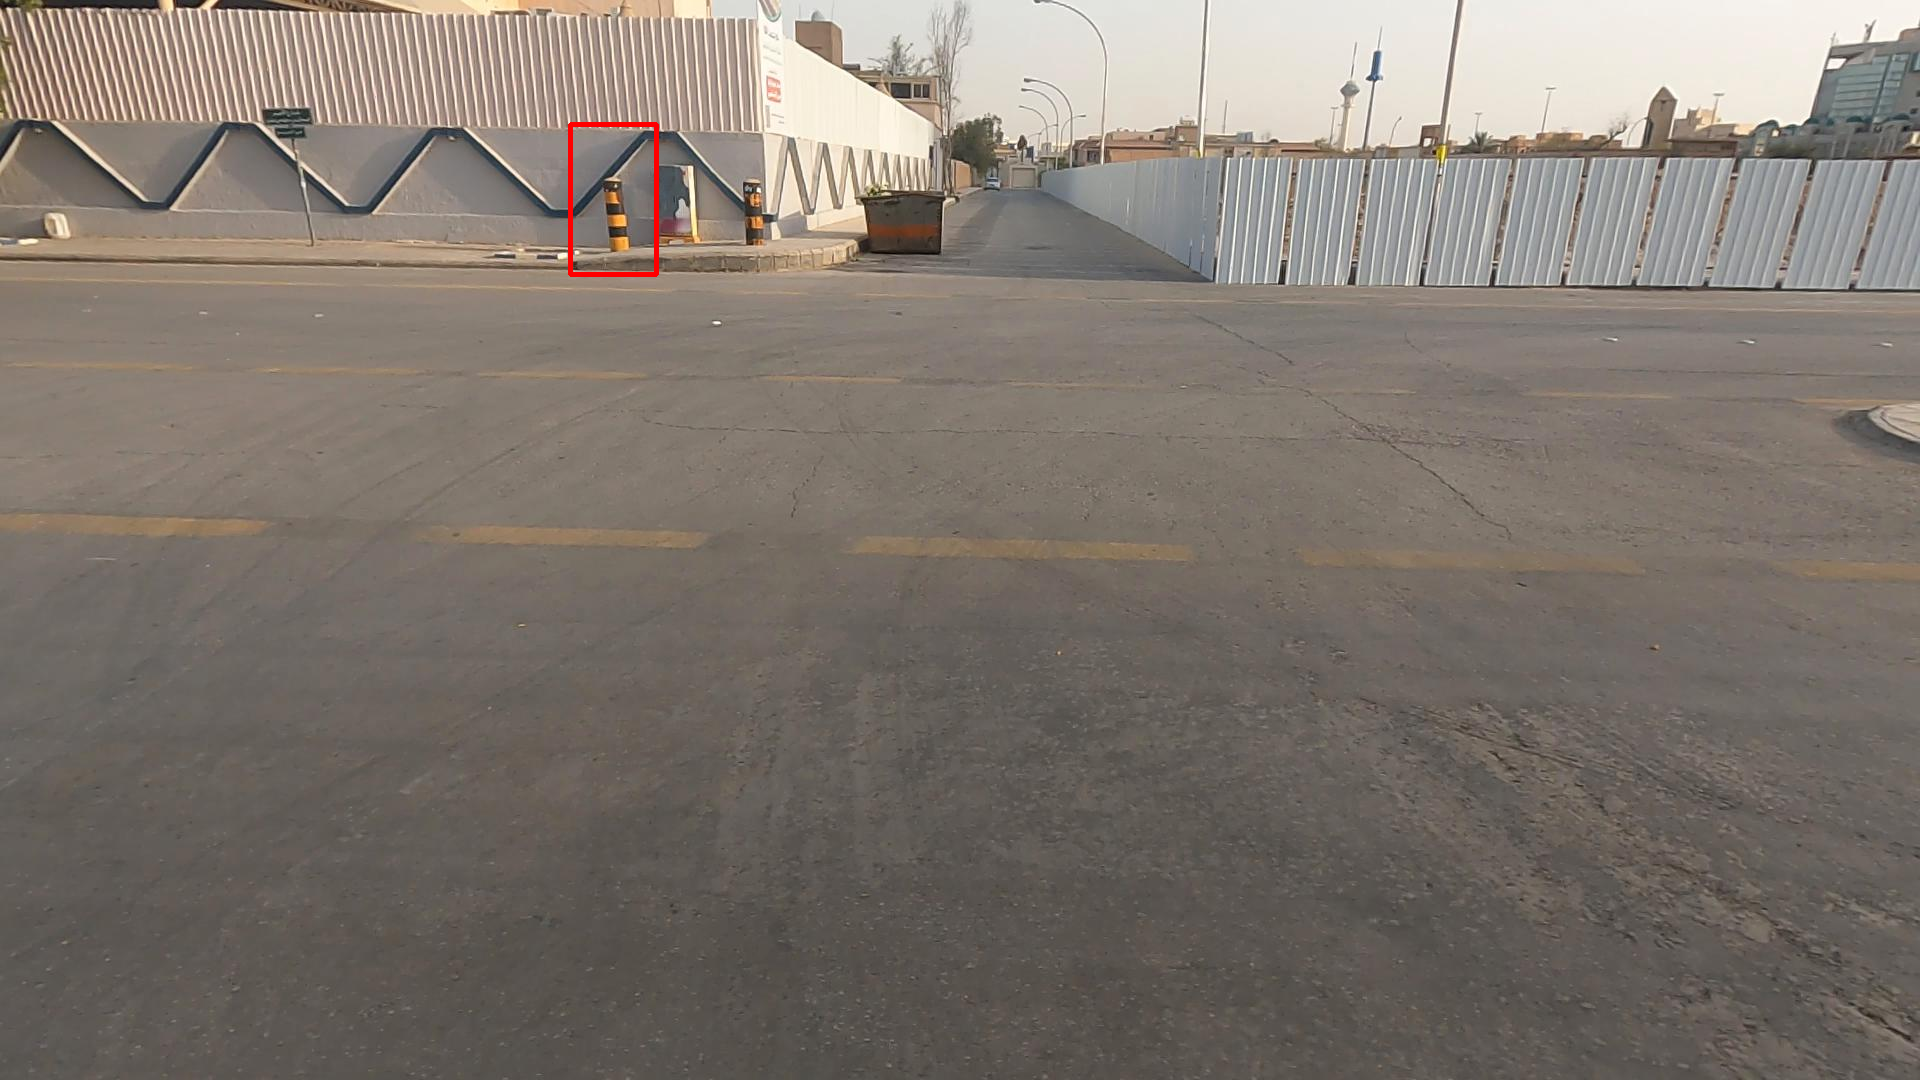

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
  

# Python program to explain cv2.rectangle() method 
   
# importing cv2 
import cv2 
   
# path 
path = f"/content/dataset/images/{img_path.iloc[10]}"
# Reading an image in default mode
src = cv2.imread(path)
img_cordicate_val  = (img_cordicate[10])*2
img_cordicate_val
img_cordicate_shap = img_cordicate_val.reshape(4,)
x_min = int(img_cordicate_shap[1])
x_max = int(img_cordicate_shap[0])
y_min = int(img_cordicate_shap[3])
y_max = int(img_cordicate_shap[2])
cv2.rectangle(src, (x_min, y_min), (x_max, y_max), (0, 0, 255), 3)
  
# # # # Blue rectangle
# # cv2.rectangle(image, (565, 182), (667, 123),
# #                (255, 0, 0), 5)
  
# # # Green rectangle
# #cv2.rectangle(output, (657, 229), (736, 275),
# #               (0, 255, 0), 4)
  
# # Using cv2.rectangle() method  
# # Displaying the image 
cv2_imshow(src)

In [ ]:
img_path = df[df["name"] == "FADED_SIGNAGE"]["image_path"]
img_cordicate = df[df["name"] == "FADED_SIGNAGE"][["xmax","xmin","ymax","ymin"]]
img_cordicate = img_cordicate.values
print(img_path.iloc[0], img_cordicate[0])

2bb02e9237647d20bf2188ba7b798f0a.jpg [386. 291. 184. 104.]


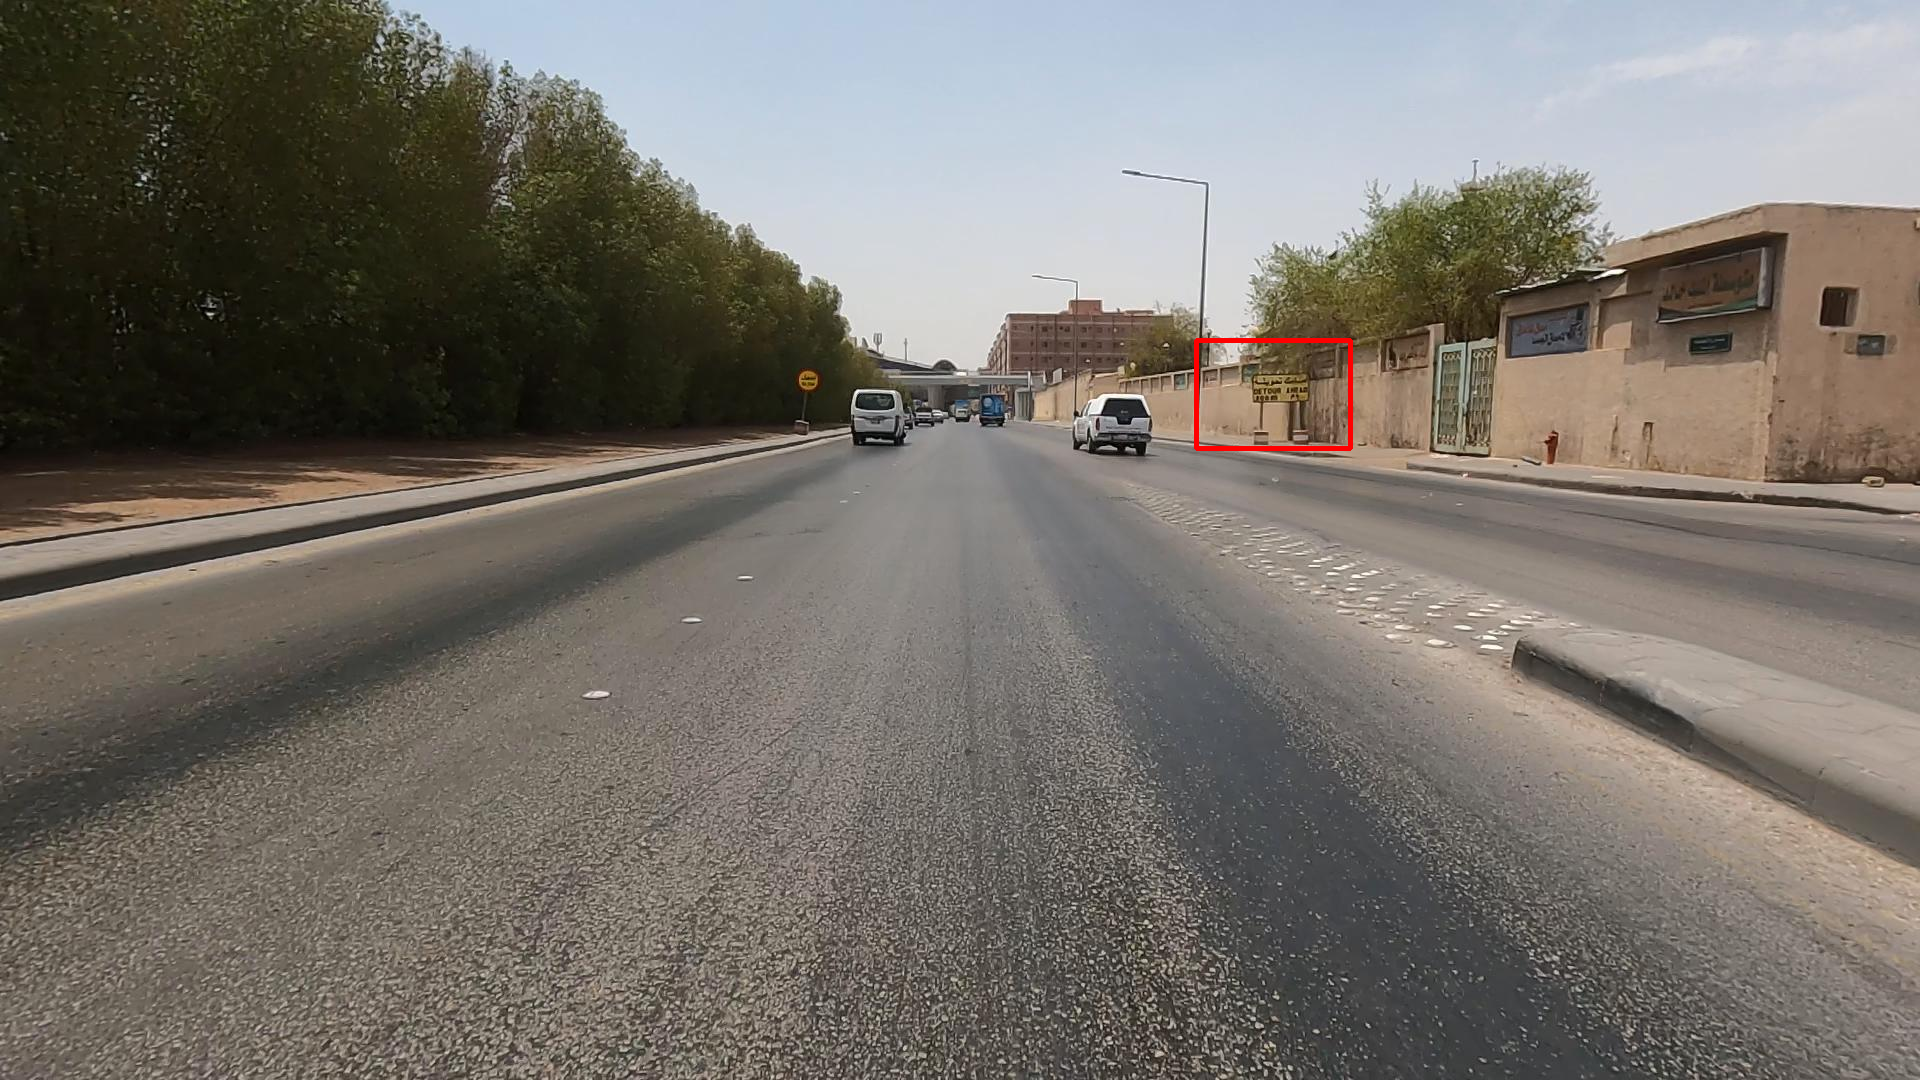

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
  

# Python program to explain cv2.rectangle() method 
   
# importing cv2 
import cv2 
   
# path 
path = f"/content/dataset/images/{img_path.iloc[66]}"
# Reading an image in default mode
src = cv2.imread(path)
img_cordicate_val  = (img_cordicate[66])*2
img_cordicate_shap = img_cordicate_val.reshape(4,)
x_min = int(img_cordicate_shap[1])
x_max = int(img_cordicate_shap[0])
y_min = int(img_cordicate_shap[3])
y_max = int(img_cordicate_shap[2])
cv2.rectangle(src, (x_min, y_min), (x_max, y_max), (0, 0, 255), 3)
  
# # # # Blue rectangle
# # cv2.rectangle(image, (565, 182), (667, 123),
# #                (255, 0, 0), 5)
  
# # # Green rectangle
# #cv2.rectangle(output, (657, 229), (736, 275),
# #               (0, 255, 0), 4)
  
# # Using cv2.rectangle() method  
# # Displaying the image 
cv2_imshow(src)

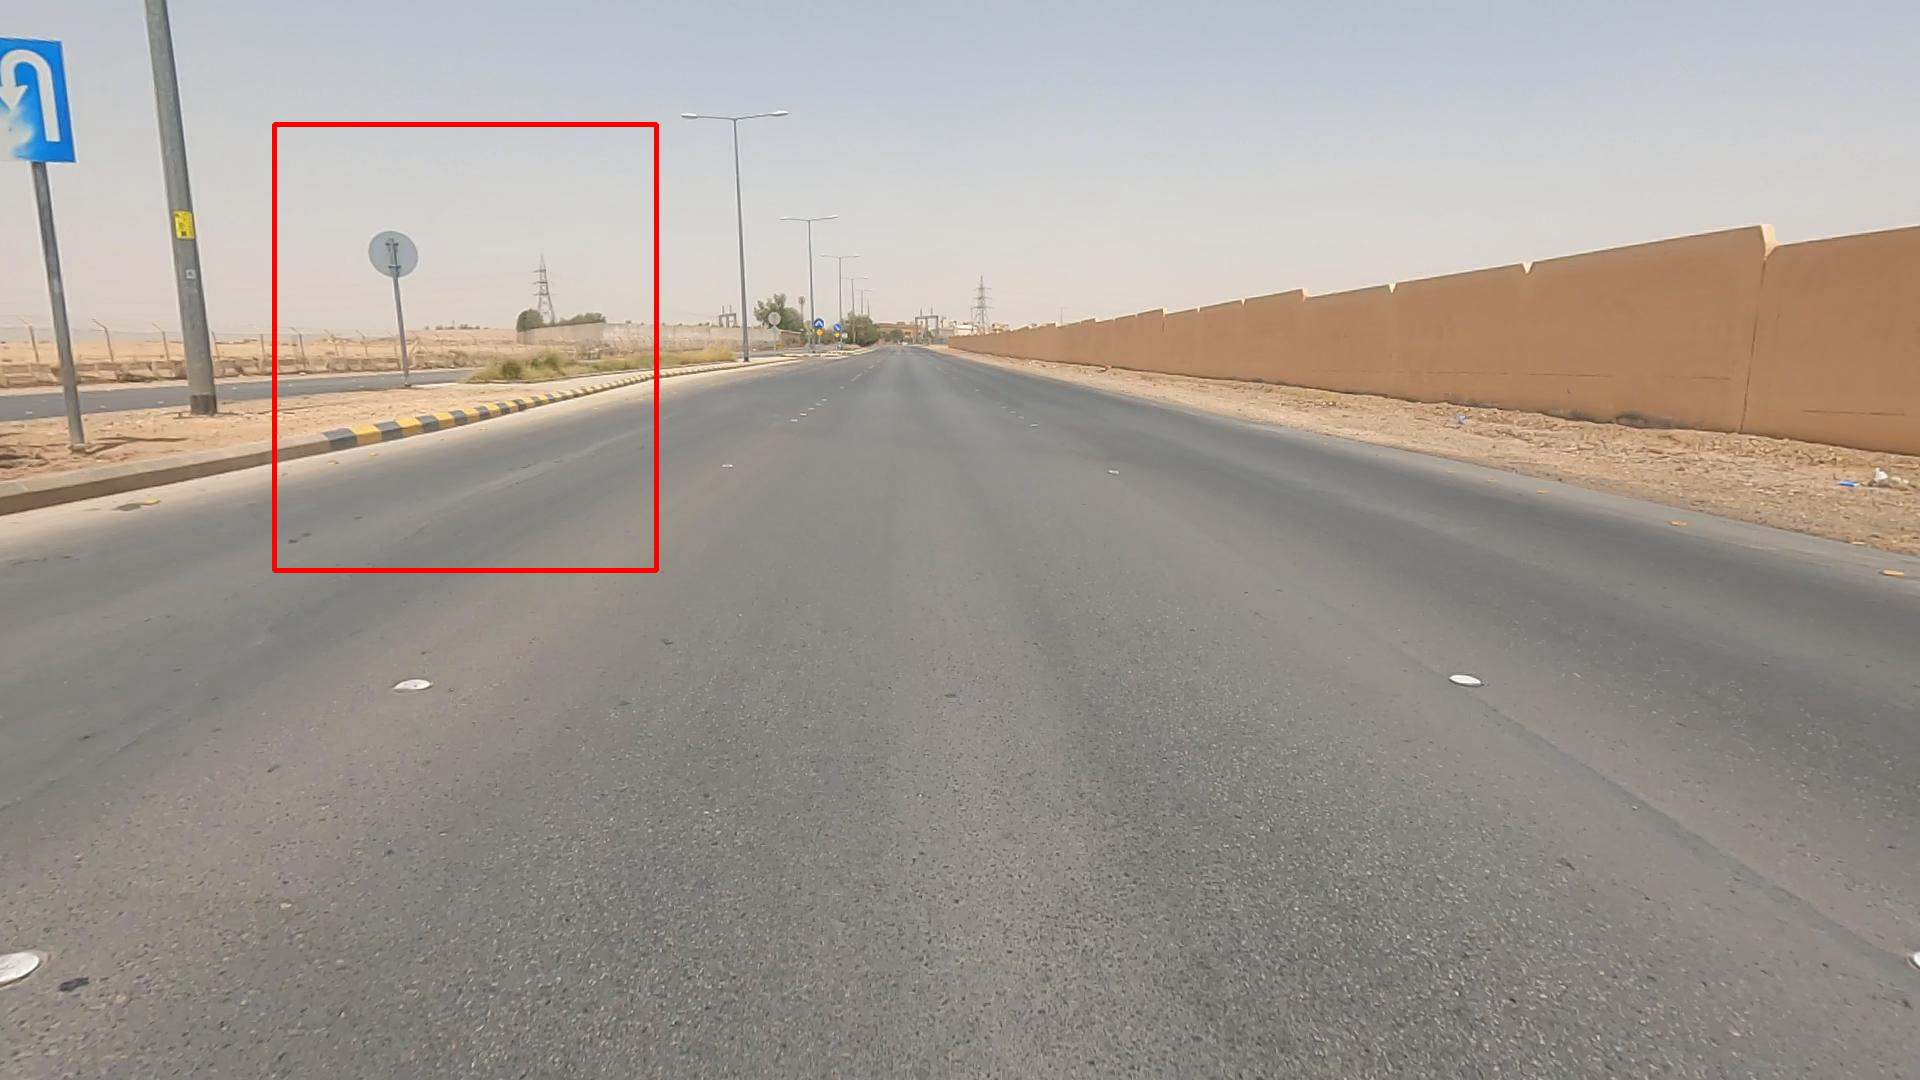

In [116]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
  
#939aa456d41bcd7d9295fe1dd6ceffb4.jpg	FADED_SIGNAGE	55.0	-13.0	123.0	-16.0
# Python program to explain cv2.rectangle() method 
   
# importing cv2 
import cv2 
   
# path 
path = f"/content/gdrive/MyDrive/classes/FADED_SIGNAGE/939aa456d41bcd7d9295fe1dd6ceffb4.jpg"
# Reading an image in default mode
src = cv2.imread(path)
img_cordicate_val  = [13.0	,16.0,	55.0	,123.0]
x_min = int(img_cordicate_shap[0])
x_max = int(img_cordicate_shap[2])
y_min = int(img_cordicate_shap[1])
y_max = int(img_cordicate_shap[3])
cv2.rectangle(src, (x_min, y_min), (x_max, y_max), (0, 0, 255), 3)
  
# # # # Blue rectangle
# # cv2.rectangle(image, (565, 182), (667, 123),
# #                (255, 0, 0), 5)
  
# # # Green rectangle
# #cv2.rectangle(output, (657, 229), (736, 275),
# #               (0, 255, 0), 4)
  
# # Using cv2.rectangle() method  
# # Displaying the image 
cv2_imshow(src)

In [105]:
# Import the required libraries
import torch
import torchvision
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes

# read input image from your computer
img = read_image('/content/gdrive/MyDrive/classes/FADED_SIGNAGE/69b6282d7731968c153e327b4f257a11.jpg')
  
# bounding box are xmin, ymin, xmax, ymax
box = [981.0,	881.0,	332.0	,178.0]
# read input image from your computer]
box = torch.tensor(box)
box = torchvision.ops.box_convert(box, in_fmt="xywh", out_fmt="xyxy")
box = box.unsqueeze(0)
# draw bounding box and fill color
img = draw_bounding_boxes(img, box, width=5,
                          colors="green", 
                          fill=True)
  
# transform this image to PIL image
img = torchvision.transforms.ToPILImage()(img)
  
# display output
img.show()

In [7]:
import os
os.listdir("/content/gdrive/MyDrive/classes")

['GARBAGE',
 'GRAFFITI',
 'FADED_SIGNAGE',
 'POTHOLES',
 'CONSTRUCTION_ROAD',
 'BROKEN_SIGNAGE',
 'BAD_STREETLIGHT',
 'BAD_BILLBOARD',
 'SAND_ON_ROAD',
 'CLUTTER_SIDEWALK',
 'UNKEPT_FACADE',
 'trian_data.csv',
 'valid_data.csv']

In [8]:
len(os.listdir("/content/gdrive/MyDrive/classes/FADED_SIGNAGE"))

235

In [9]:
2000//235

8

In [10]:
import pandas as pd
df_FADED_SIGNAGE=pd.read_csv("/content/gdrive/MyDrive//classes/FADED_SIGNAGE/data_csv/FADED_SIGNAGE.csv")

In [11]:
df_FADED_SIGNAGE

Unnamed: 0  Unnamed: 0.1  class                            image_path  \
0             0             0    1.0      FADED SIGNAGE in street_256.jpeg   
1             1             1    1.0      FADED SIGNAGE in street_234.jpeg   
2             2             2    1.0      FADED SIGNAGE in street_153.jpeg   
3             3             3    1.0    istockphoto-1162362949-612x612.jpg   
4             4             4    1.0      FADED SIGNAGE in street_252.jpeg   
..          ...           ...    ...                                   ...   
287          83         17146    1.0  ba7c3e7cfd9ee44c6d0e64d328091c7b.jpg   
288          84         18756    1.0  69b6282d7731968c153e327b4f257a11.jpg   
289          85         18757    1.0  69b6282d7731968c153e327b4f257a11.jpg   
290          86         19334    1.0  4a327e37237452aeb2a31cecb9cedac2.jpg   
291          87         19363    1.0  21e3415fab08be092f9ba781a096a666.jpg   

              name   xmax   xmin   ymax   ymin  
0    FADED_SIGNAGE  159.0   30.0  214.0   23.0  
1    FADED_SIGNAGE  316.0   11.0  200.0   81.0  
2    FADED_SIGNAGE  229.0   95.0  265.0   25.0  
3    FADED_SIGNAGE  221.0   65.0  249.0   50.0  
4    FADED_SIGNAGE  158.0   40.0  217.0   69.0  
..             ...    ...    ...    ...    ...  
287  FADED_SIGNAGE  585.0  537.0  256.0  196.0  
288  FADED_SIGNAGE  981.0  881.0  332.0  178.0  
289  FADED_SIGNAGE  904.0  788.0  327.0  171.0  
290  FADED_SIGNAGE  207.0  126.0  162.0   82.0  
291  FADED_SIGNAGE  294.0  185.0  196.0  111.0  

[292 rows x 9 columns]

In [13]:
#transform label to pascal (x_min,Y_min,x_max,y_max)
df_FADED_SIGNAGE.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'class', 'image_path', 'name', 'xmax',
       'xmin', 'ymax', 'ymin'],
      dtype='object')

In [14]:
df_FADED_SIGNAGE['image_path'].value_counts()

9d5df48c3182c2b2a201d3203661bdba.jpg    6
FADED SIGNAGE in street_157.jpeg        5
FADED SIGNAGE in street_239.jpeg        5
FADED SIGNAGE in street_202.jpeg        5
56f810731a1584f88ac96657394ca426.jpg    4
                                       ..
istockphoto-186990547-612x612.jpg       1
istockphoto-864506844-612x612.jpg       1
FADED SIGNAGE in street_276.jpeg        1
istockphoto-1347072362-612x612.jpg      1
21e3415fab08be092f9ba781a096a666.jpg    1
Name: image_path, Length: 234, dtype: int64

In [15]:
# list uniqe images
x=[ img for img in df_FADED_SIGNAGE['image_path'] if df_FADED_SIGNAGE['image_path'].value_counts()[img]==1]

In [16]:
len(x)

201

In [17]:
# collect columns that have unique images and one bbox
data=[row for row in df_FADED_SIGNAGE.values if row[3] in x ]

In [18]:
data=pd.DataFrame(data,columns=['index','index2','class', 'image_path', 'name', 'xmax', 'xmin', 'ymax',
       'ymin'])

In [19]:
data

index  index2  class                            image_path  \
0        0       0    1.0      FADED SIGNAGE in street_256.jpeg   
1        1       1    1.0      FADED SIGNAGE in street_234.jpeg   
2        2       2    1.0      FADED SIGNAGE in street_153.jpeg   
3        3       3    1.0    istockphoto-1162362949-612x612.jpg   
4        4       4    1.0      FADED SIGNAGE in street_252.jpeg   
..     ...     ...    ...                                   ...   
196     73   15510    1.0  350a83b1671201fb202125a6ddd8cc47.jpg   
197     80   16808    1.0  0256f017898f935641404c85fd6bedf8.jpg   
198     83   17146    1.0  ba7c3e7cfd9ee44c6d0e64d328091c7b.jpg   
199     86   19334    1.0  4a327e37237452aeb2a31cecb9cedac2.jpg   
200     87   19363    1.0  21e3415fab08be092f9ba781a096a666.jpg   

              name   xmax   xmin   ymax   ymin  
0    FADED_SIGNAGE  159.0   30.0  214.0   23.0  
1    FADED_SIGNAGE  316.0   11.0  200.0   81.0  
2    FADED_SIGNAGE  229.0   95.0  265.0   25.0  
3    FADED_SIGNAGE  221.0   65.0  249.0   50.0  
4    FADED_SIGNAGE  158.0   40.0  217.0   69.0  
..             ...    ...    ...    ...    ...  
196  FADED_SIGNAGE  132.0   14.0  177.0   98.0  
197  FADED_SIGNAGE  708.0  548.0  121.0  -18.0  
198  FADED_SIGNAGE  585.0  537.0  256.0  196.0  
199  FADED_SIGNAGE  207.0  126.0  162.0   82.0  
200  FADED_SIGNAGE  294.0  185.0  196.0  111.0  

[201 rows x 9 columns]

In [21]:
df_boxes=[]
df_boxes=data[['xmin', 'ymin','xmax', 'ymax']]

In [22]:


df_boxes[['xmin', 'ymin','xmax', 'ymax']]=data[['xmin', 'ymin','xmax', 'ymax']]

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [19]:
data[180:200]

index  index2  class                            image_path  \
180     55    9842    1.0  a13b23a0b68c56edc34e017f4b3333ba.jpg   
181     56    9963    1.0  7d3ee1c936d1ca87bcf6bb900f1e95f6.jpg   
182     57   10611    1.0  be73198259b72b2ad725c3a92043a513.jpg   
183     58   10723    1.0  e3fcfa272e6db2f6efcb79f08362c583.jpg   
184     59   10821    1.0  e1f44f46572fd6c217e4921428fdda3f.jpg   
185     60   10877    1.0  7d122928742441fb25822adb69341698.jpg   
186     61   11243    1.0  7d6428211ede15b64913abef5b10f50a.jpg   
187     62   11332    1.0  d83c462d65199e5c132d6ffec72b5181.jpg   
188     63   12241    1.0  939aa456d41bcd7d9295fe1dd6ceffb4.jpg   
189     64   12419    1.0  f54216953d3f3639bbc12e770c236f49.jpg   
190     67   14516    1.0  97719643b1ca05c5b6169ece7bd12e76.jpg   
191     68   14687    1.0  3208d988990c1344bc5611cb2aa5c010.jpg   
192     69   14899    1.0  cebf971140d839b8ecad15979deffc01.jpg   
193     70   14930    1.0  95709ff5e74d0b29d7f8a8e597e161d6.jpg   
194     71   15057    1.0  6fbd94767968113a7d05caab0751ac44.jpg   
195     72   15334    1.0  c19d9394af84b405c76bf26864ca0c47.jpg   
196     73   15510    1.0  350a83b1671201fb202125a6ddd8cc47.jpg   
197     80   16808    1.0  0256f017898f935641404c85fd6bedf8.jpg   
198     83   17146    1.0  ba7c3e7cfd9ee44c6d0e64d328091c7b.jpg   
199     86   19334    1.0  4a327e37237452aeb2a31cecb9cedac2.jpg   

              name   xmax   xmin   ymax   ymin  
180  FADED_SIGNAGE  663.0  540.0  228.0  131.0  
181  FADED_SIGNAGE  675.0  598.0  224.0  170.0  
182  FADED_SIGNAGE  277.0   56.0  272.0  -62.0  
183  FADED_SIGNAGE  280.0  229.0  238.0  194.0  
184  FADED_SIGNAGE  364.0  295.0  206.0  141.0  
185  FADED_SIGNAGE  376.0  293.0  217.0  135.0  
186  FADED_SIGNAGE  406.0  303.0  133.0   21.0  
187  FADED_SIGNAGE  695.0  623.0  166.0  117.0  
188  FADED_SIGNAGE   55.0  -13.0  123.0  -16.0  
189  FADED_SIGNAGE  523.0  454.0  289.0  202.0  
190  FADED_SIGNAGE  413.0  283.0  216.0   80.0  
191  FADED_SIGNAGE  501.0  440.0  115.0   46.0  
192  FADED_SIGNAGE  118.0   46.0  257.0  168.0  
193  FADED_SIGNAGE  242.0   83.0  214.0   55.0  
194  FADED_SIGNAGE  355.0  287.0  242.0  165.0  
195  FADED_SIGNAGE  316.0  258.0  195.0  150.0  
196  FADED_SIGNAGE  132.0   14.0  177.0   98.0  
197  FADED_SIGNAGE  708.0  548.0  121.0  -18.0  
198  FADED_SIGNAGE  585.0  537.0  256.0  196.0  
199  FADED_SIGNAGE  207.0  126.0  162.0   82.0

In [23]:
df_boxes[180:200]

xmin   ymin   xmax   ymax
180  540.0  131.0  663.0  228.0
181  598.0  170.0  675.0  224.0
182   56.0  -62.0  277.0  272.0
183  229.0  194.0  280.0  238.0
184  295.0  141.0  364.0  206.0
185  293.0  135.0  376.0  217.0
186  303.0   21.0  406.0  133.0
187  623.0  117.0  695.0  166.0
188  -13.0  -16.0   55.0  123.0
189  454.0  202.0  523.0  289.0
190  283.0   80.0  413.0  216.0
191  440.0   46.0  501.0  115.0
192   46.0  168.0  118.0  257.0
193   83.0   55.0  242.0  214.0
194  287.0  165.0  355.0  242.0
195  258.0  150.0  316.0  195.0
196   14.0   98.0  132.0  177.0
197  548.0  -18.0  708.0  121.0
198  537.0  196.0  585.0  256.0
199  126.0   82.0  207.0  162.0

In [39]:
!pip install utils


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import cv2
import albumentations  as A
import numpy as np


In [25]:
df_images=data['image_path']
image=df_images.values.tolist()

In [27]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min,y_min, x_max,  y_max = bbox
   
    cv2.rectangle(img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), color=color, thickness=thickness)
    
    
    
    return img


def visualize(image, bboxes):
    img = image.copy()
    for bbox in  bboxes :
        img = visualize_bbox(img, bbox)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [49]:
transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.ShiftScaleRotate(p=0.5),
        A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),
    ],
    bbox_params=A.BboxParams(format='pascal_voc', label_fields=[]),
)

In [28]:
transform = A.Compose([
        A.Resize(width=640,height=640),
        A.Rotate(limit=10,p=0.9),
        A.HorizontalFlip(p=0.5),
        A.ShiftScaleRotate(p=0.5),
        A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),
    ],
    bbox_params=A.BboxParams(format='pascal_voc', label_fields=[]),
)

In [29]:
df_boxes

xmin   ymin   xmax   ymax
0     30.0   23.0  159.0  214.0
1     11.0   81.0  316.0  200.0
2     95.0   25.0  229.0  265.0
3     65.0   50.0  221.0  249.0
4     40.0   69.0  158.0  217.0
..     ...    ...    ...    ...
196   14.0   98.0  132.0  177.0
197  548.0  -18.0  708.0  121.0
198  537.0  196.0  585.0  256.0
199  126.0   82.0  207.0  162.0
200  185.0  111.0  294.0  196.0

[201 rows x 4 columns]

In [30]:
((df_boxes.iloc[0])*2).tolist()

[60.0, 46.0, 318.0, 428.0]

In [32]:
import random
boxes=[]
count=0
for img in image:
  data_boxes=[((df_boxes.iloc[count])*2).tolist()]
  count+=1
  im= cv2.imread('/content/gdrive/MyDrive/classes/FADED_SIGNAGE/'+img)
  im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
  for i in range(10):
    try:
        transformed = transform(image=im, bboxes=data_boxes)
        if transformed['bboxes'] != [] :
            cv2.imwrite(f'/content/gdrive/MyDrive/Smartathon/aug_images/FADED_SIGNAGE/{img}_{i}.jpg',transformed['image'])

            cord=list(transformed['bboxes'][0])
            path=f"{img}_{i}.jpg"
            boxes.append(['FADED_SIGNAGE',path,cord[0],cord[1],cord[2],cord[3]]) 
    except:
        continue
          

In [33]:
import os
len(os.listdir('/content/gdrive/MyDrive/Smartathon/aug_images/FADED_SIGNAGE'))

1919

In [34]:
len(boxes)

1919

In [35]:
df_boxes=pd.DataFrame(boxes,columns=['BAD_BILLBOARD','image_path','xmin', 'ymin','xmax', 'ymax'])

In [36]:
df_boxes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1919 entries, 0 to 1918
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BAD_BILLBOARD  1919 non-null   object 
 1   image_path     1919 non-null   object 
 2   xmin           1919 non-null   float64
 3   ymin           1919 non-null   float64
 4   xmax           1919 non-null   float64
 5   ymax           1919 non-null   float64
dtypes: float64(4), object(2)
memory usage: 90.1+ KB


In [37]:
df_boxes[40:45]

BAD_BILLBOARD                              image_path        xmin  \
40  FADED_SIGNAGE  FADED SIGNAGE in street_252.jpeg_0.jpg  179.922177   
41  FADED_SIGNAGE  FADED SIGNAGE in street_252.jpeg_1.jpg   28.957482   
42  FADED_SIGNAGE  FADED SIGNAGE in street_252.jpeg_2.jpg   60.470750   
43  FADED_SIGNAGE  FADED SIGNAGE in street_252.jpeg_3.jpg   22.611055   
44  FADED_SIGNAGE  FADED SIGNAGE in street_252.jpeg_4.jpg  328.823896   

          ymin        xmax        ymax  
40   35.181215  563.038312  429.281109  
41    0.000000  470.895297  398.283161  
42  139.698791  329.278842  461.125537  
43  147.744823  366.257862  525.961584  
44  149.468733  588.225445  456.047426

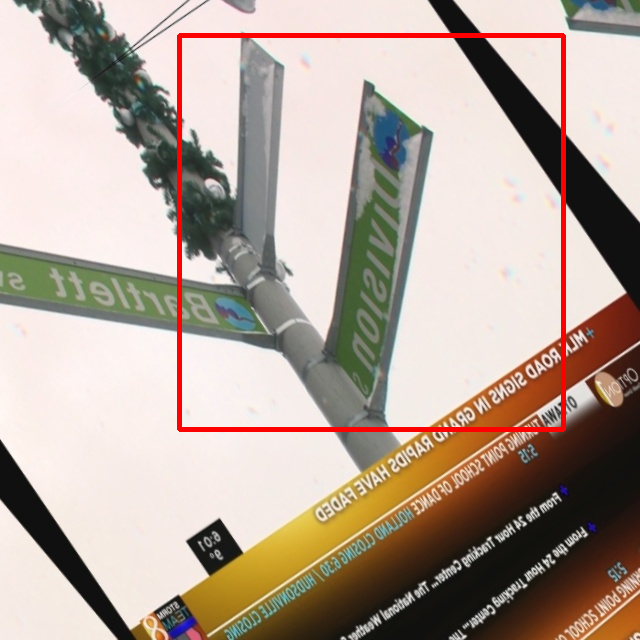

In [38]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
  
#939aa456d41bcd7d9295fe1dd6ceffb4.jpg	FADED_SIGNAGE	55.0	-13.0	123.0	-16.0
# Python program to explain cv2.rectangle() method 
   
# importing cv2 
import cv2 
   
# path 
img="FADED SIGNAGE in street_252.jpeg_1.jpg"
path = r"/content/gdrive/MyDrive/Smartathon/aug_images/FADED_SIGNAGE/FADED SIGNAGE in street_252.jpeg_0.jpg"
# Reading an image in default mode
src = cv2.imread(path)
img_cordicate_val  = [179.922177,	35.181215,	563.038312,	429.281109]
x_min = int(img_cordicate_val[0])
x_max = int(img_cordicate_val[2])
y_min = int(img_cordicate_val[1])
y_max = int(img_cordicate_val[3])
cv2.rectangle(src, (x_min, y_min), (x_max, y_max), (0, 0, 255), 3)
  
# # # # Blue rectangle
# # cv2.rectangle(image, (565, 182), (667, 123),
# #                (255, 0, 0), 5)
  
# # # Green rectangle
# #cv2.rectangle(output, (657, 229), (736, 275),
# #               (0, 255, 0), 4)
  
# # Using cv2.rectangle() method  
# # Displaying the image 
cv2_imshow(src)

In [46]:
df_boxes.to_csv('/content/gdrive/MyDrive/Smartathon/aug_images/FADED_SIGNAGE/aug_data.csv')

In [47]:
 if 'aug_data.csv' in os.listdir('/content/gdrive/MyDrive/Smartathon/aug_images/FADED_SIGNAGE'):
   print("success")


success


In [48]:
pd.read_csv('/content/gdrive/MyDrive/Smartathon/aug_images/FADED_SIGNAGE/aug_data.csv')

Unnamed: 0  BAD_BILLBOARD                                  image_path  \
0              0  FADED_SIGNAGE      FADED SIGNAGE in street_256.jpeg_0.jpg   
1              1  FADED_SIGNAGE      FADED SIGNAGE in street_256.jpeg_1.jpg   
2              2  FADED_SIGNAGE      FADED SIGNAGE in street_256.jpeg_2.jpg   
3              3  FADED_SIGNAGE      FADED SIGNAGE in street_256.jpeg_3.jpg   
4              4  FADED_SIGNAGE      FADED SIGNAGE in street_256.jpeg_4.jpg   
...          ...            ...                                         ...   
1914        1914  FADED_SIGNAGE  21e3415fab08be092f9ba781a096a666.jpg_5.jpg   
1915        1915  FADED_SIGNAGE  21e3415fab08be092f9ba781a096a666.jpg_6.jpg   
1916        1916  FADED_SIGNAGE  21e3415fab08be092f9ba781a096a666.jpg_7.jpg   
1917        1917  FADED_SIGNAGE  21e3415fab08be092f9ba781a096a666.jpg_8.jpg   
1918        1918  FADED_SIGNAGE  21e3415fab08be092f9ba781a096a666.jpg_9.jpg   

            xmin        ymin        xmax        ymax  
0      44.305005   46.594042  324.367926  443.134133  
1      80.525985    0.000000  534.498404  381.095456  
2      28.478081   48.296077  331.207083  458.950044  
3       0.000000   67.858917  365.191169  518.999189  
4       5.463597    0.000000  365.300904  424.272415  
...          ...         ...         ...         ...  
1914  281.772531   55.444671  390.235737  170.206953  
1915  126.135997  125.571172  201.879495  228.508248  
1916  109.724450  116.857605  183.754506  215.897204  
1917  101.739261  148.156588  186.194249  257.036900  
1918  435.161797  122.671100  512.404924  226.661353  

[1919 rows x 7 columns]